In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/Kaggle. Or use the environment method.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Inorder to get all the columns of the dataset we do the following
pd.pandas.set_option('display.max_columns',None)
HPdf = pd.read_csv("/content/gdrive/MyDrive/Kaggle/train.csv")

In [ ]:
# now see the shape
HPdf.shape
# 1460 rows and 81 columns!

(1460, 81)

In [ ]:
HPdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# what we will do here
'''
Missing Values
All The Numerical Variables
Distribution of the Numerical Variables
Categorical Variables
Cardinality of Categorical Variables
Outliers
Relationship between independent and dependent feature(SalePrice)
'''

'\nMissing Values\nAll The Numerical Variables\nDistribution of the Numerical Variables\nCategorical Variables\nCardinality of Categorical Variables\nOutliers\nRelationship between independent and dependent feature(SalePrice)\n'

#Missing Values

In [ ]:
# here is the code to find the NaN (missing values)
features_with_na = [f for f in HPdf.columns if HPdf[f].isnull().sum()>1]
# we print the missing values with percentage
for f in features_with_na:
    print(f,np.round(HPdf[f].isnull().mean(),4), '% missing percent')


LotFrontage 0.1774 % missing percent
Alley 0.9377 % missing percent
MasVnrType 0.0055 % missing percent
MasVnrArea 0.0055 % missing percent
BsmtQual 0.0253 % missing percent
BsmtCond 0.0253 % missing percent
BsmtExposure 0.026 % missing percent
BsmtFinType1 0.0253 % missing percent
BsmtFinType2 0.026 % missing percent
FireplaceQu 0.4726 % missing percent
GarageType 0.0555 % missing percent
GarageYrBlt 0.0555 % missing percent
GarageFinish 0.0555 % missing percent
GarageQual 0.0555 % missing percent
GarageCond 0.0555 % missing percent
PoolQC 0.9952 % missing percent
Fence 0.8075 % missing percent
MiscFeature 0.963 % missing percent


##Since they are many missing values, we need to find the relationship between missing values and Sales Price

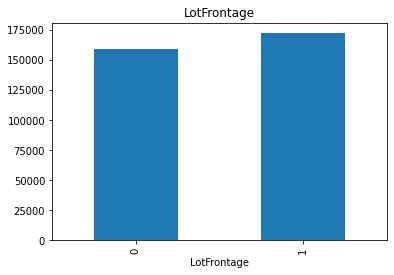

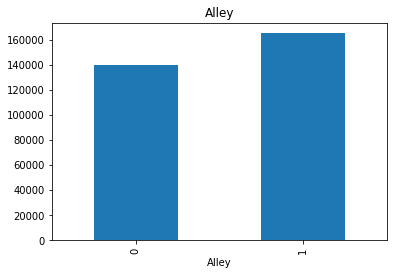

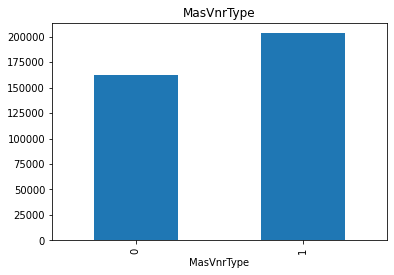

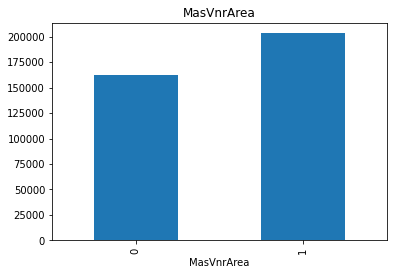

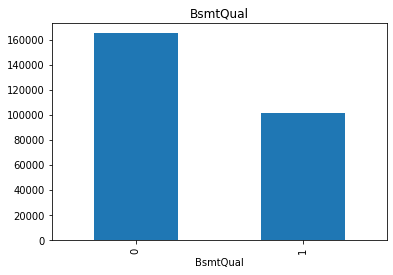

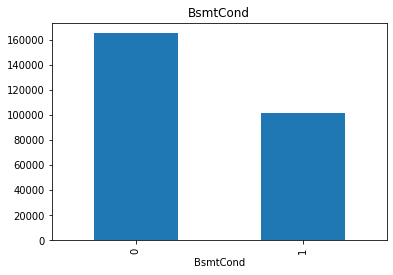

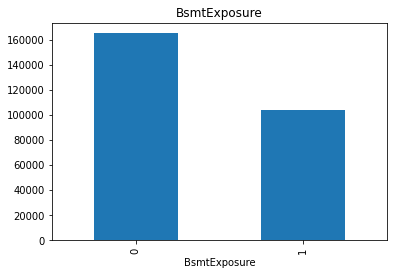

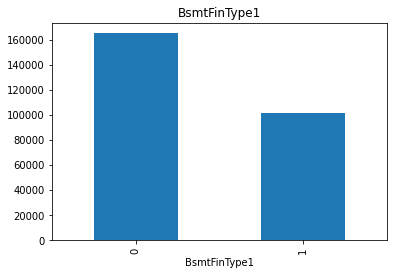

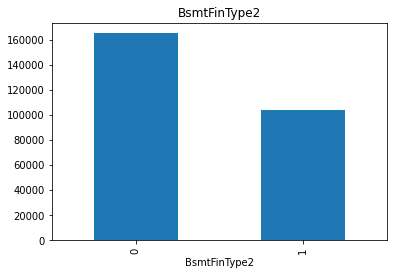

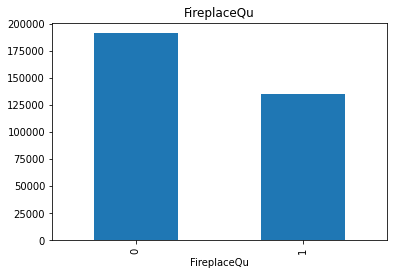

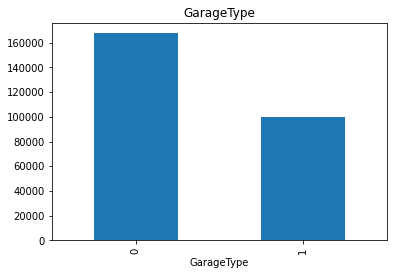

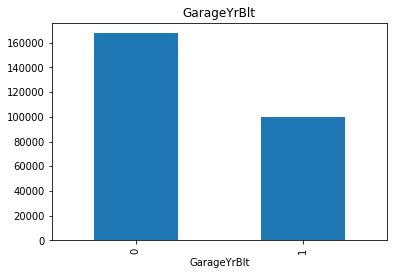

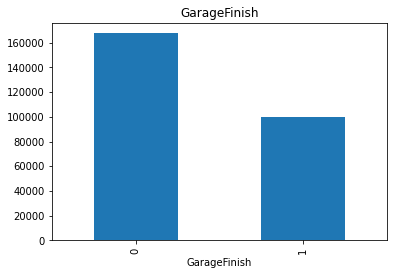

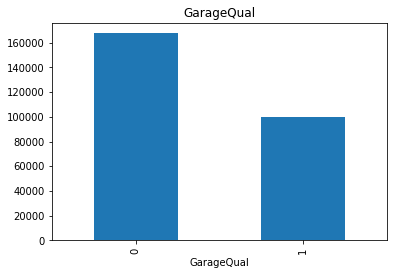

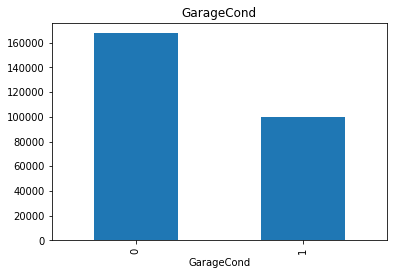

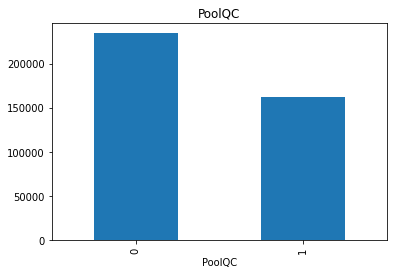

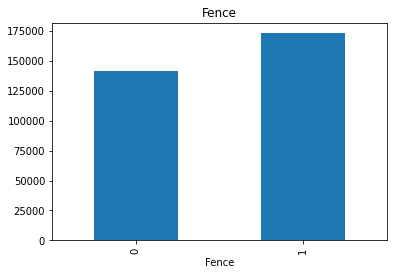

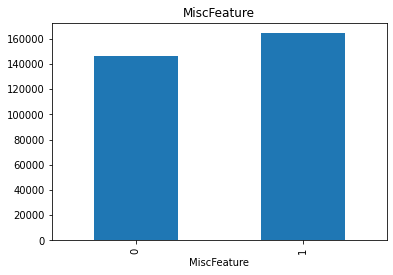

In [ ]:
for f in features_with_na:
    # we set 1 for null 0 for not null
    HPdf[f] = np.where(HPdf[f].isnull(), 1, 0)
    # 
    HPdf.groupby(f)['SalePrice'].median().plot.bar()
    plt.title(f)
    plt.show()

Okay, there are certain fetures with maximum NaN values and price simultaneously. So we  should consider those features.

# Exploring Numerical, Continuous, Discrete

In [ ]:
# getting only numerical features
numerical_features = [f for f in HPdf.columns if HPdf[f].dtypes!='O']
print("length of numerical feature: ", len(numerical_features))
HPdf[numerical_features].head()

length of numerical feature:  53


,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,0,8450,1,7,5,2003,2003,0,0,0,0,0,0,706,0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,1,0,0,0,2,548,0,0,0,61,0,0,0,0,1,1,1,0,2,2008,208500
1,2,20,0,9600,1,6,8,1976,1976,0,0,0,0,0,0,978,0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,0,0,0,0,2,460,0,0,298,0,0,0,0,0,1,1,1,0,5,2007,181500
2,3,60,0,11250,1,7,5,2001,2002,0,0,0,0,0,0,486,0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,0,0,0,0,2,608,0,0,0,42,0,0,0,0,1,1,1,0,9,2008,223500
3,4,70,0,9550,1,7,5,1915,1970,0,0,0,0,0,0,216,0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,0,0,0,0,3,642,0,0,0,35,272,0,0,0,1,1,1,0,2,2006,140000
4,5,60,0,14260,1,8,5,2000,2000,0,0,0,0,0,0,655,0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,0,0,0,0,3,836,0,0,192,84,0,0,0,0,1,1,1,0,12,2008,250000


In [ ]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
# now we get year feature
year_feature = [f for f in numerical_features if 'Yr' in f or 'Year' in f]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

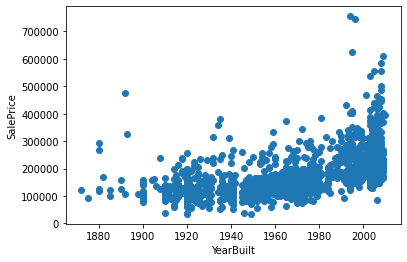

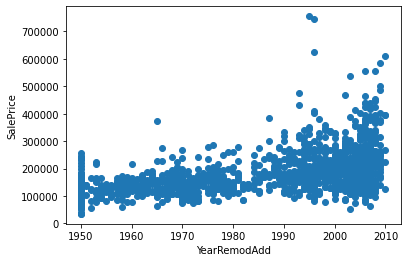

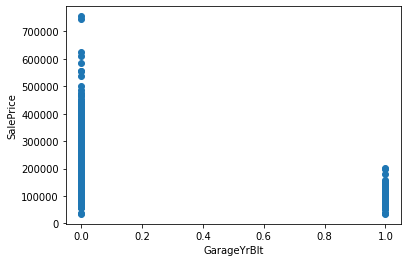

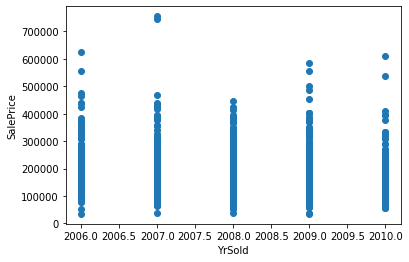

In [ ]:
# now we find the visualization of relation between feature and salesprice
for f in year_feature:
    plt.scatter(HPdf[f], HPdf['SalePrice'])
    plt.xlabel(f)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
# Finding discrete_features(not continuous feature)
discrete_features = [f for f in numerical_features if len(HPdf[f].unique())<25 and f not in year_feature+['Id']]
print(f'count of discrete_feature {len(discrete_features)}')

count of discrete_feature 34


In [ ]:
discrete_features

['MSSubClass',
 'LotFrontage',
 'Alley',
 'OverallQual',
 'OverallCond',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold']

In [ ]:
HPdf[discrete_features]

,MSSubClass,LotFrontage,Alley,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold
0,60,0,1,7,5,0,0,0,0,0,0,0,0,1,0,2,1,3,1,8,0,1,0,0,2,0,0,0,0,1,1,1,0,2
1,20,0,1,6,8,0,0,0,0,0,0,0,0,0,1,2,0,3,1,6,1,0,0,0,2,0,0,0,0,1,1,1,0,5
2,60,0,1,7,5,0,0,0,0,0,0,0,0,1,0,2,1,3,1,6,1,0,0,0,2,0,0,0,0,1,1,1,0,9
3,70,0,1,7,5,0,0,0,0,0,0,0,0,1,0,1,0,3,1,7,1,0,0,0,3,0,0,0,0,1,1,1,0,2
4,60,0,1,8,5,0,0,0,0,0,0,0,0,1,0,2,1,4,1,9,1,0,0,0,3,0,0,0,0,1,1,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,1,6,5,0,0,0,0,0,0,0,0,0,0,2,1,3,1,7,1,0,0,0,2,0,0,0,0,1,1,1,0,8
1456,20,0,1,6,6,0,0,0,0,0,0,0,0,1,0,2,0,3,1,7,2,0,0,0,2,0,0,0,0,1,0,1,0,2
1457,70,0,1,7,9,0,0,0,0,0,0,0,0,0,0,2,0,4,1,9,2,0,0,0,1,0,0,0,0,1,0,0,2500,5
1458,20,0,1,5,6,0,0,0,0,0,0,0,0,1,0,1,0,2,1,5,0,1,0,0,1,0,0,0,0,1,1,1,0,4


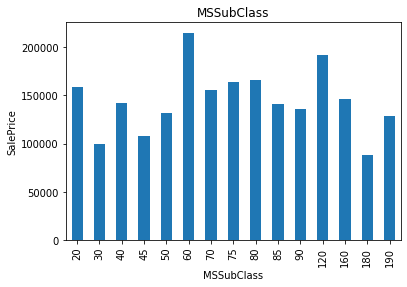

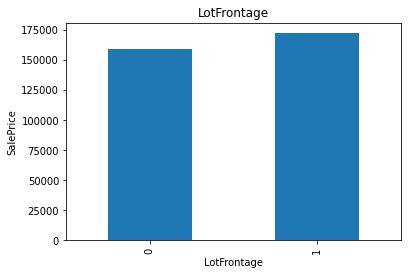

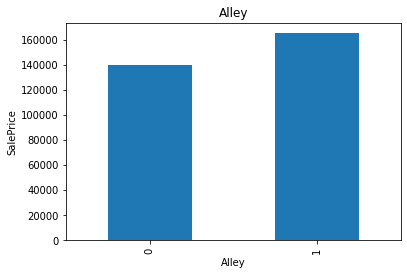

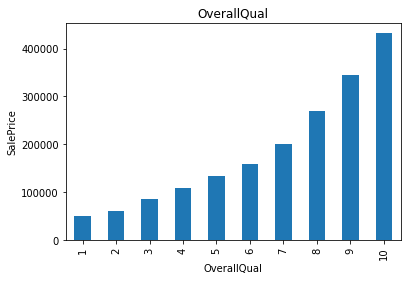

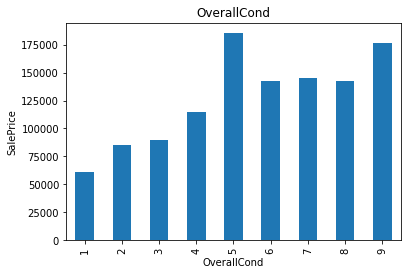

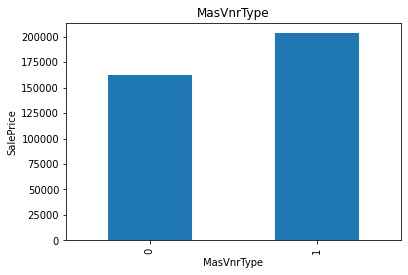

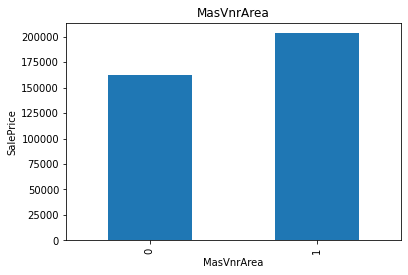

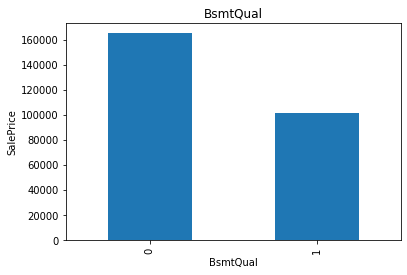

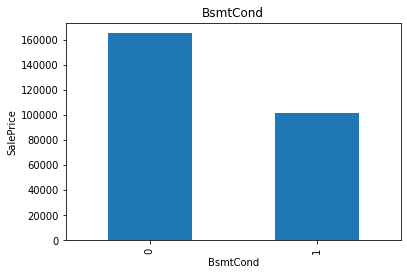

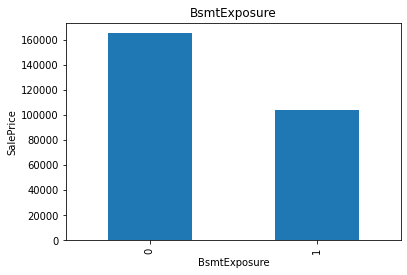

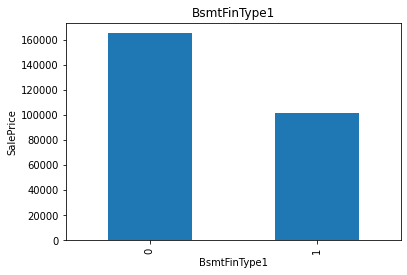

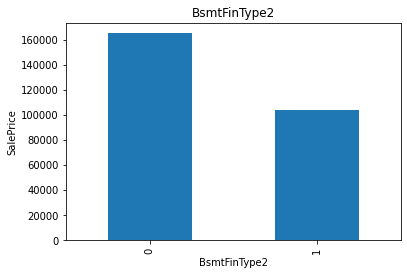

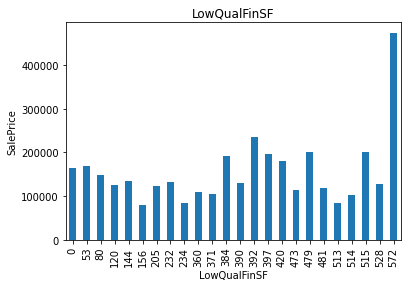

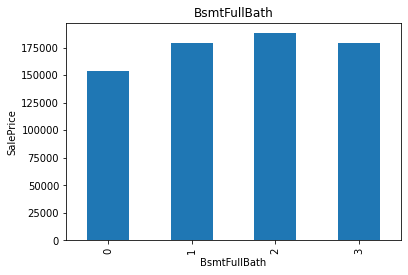

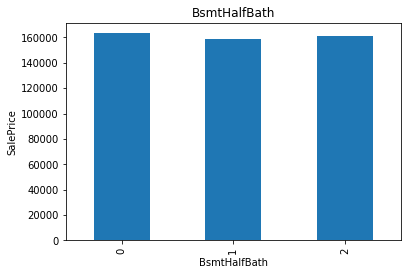

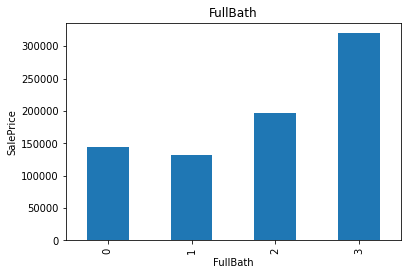

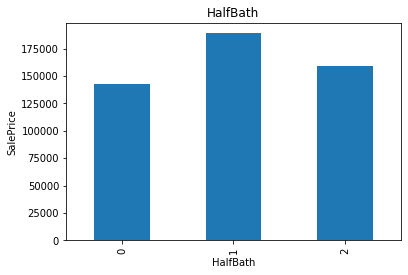

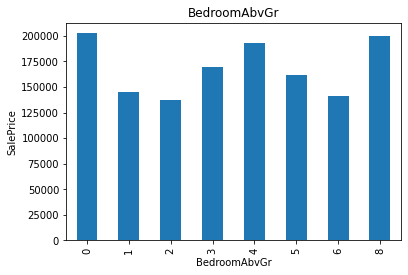

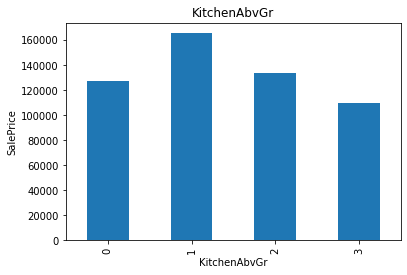

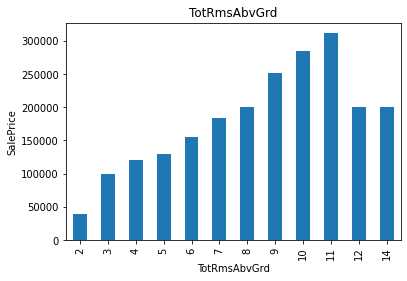

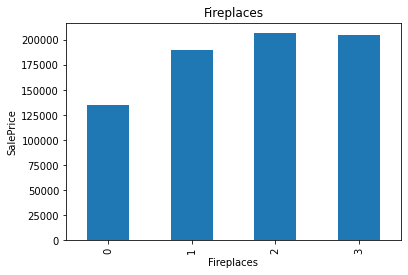

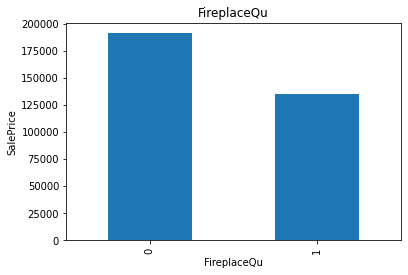

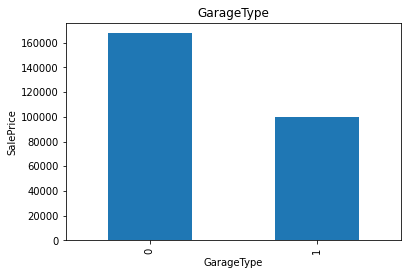

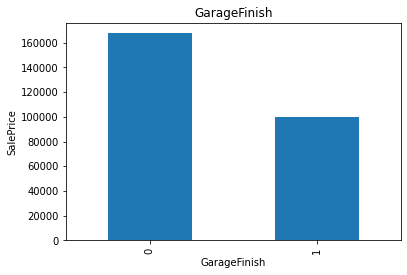

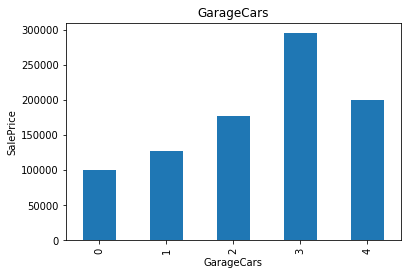

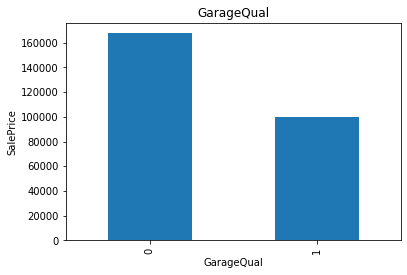

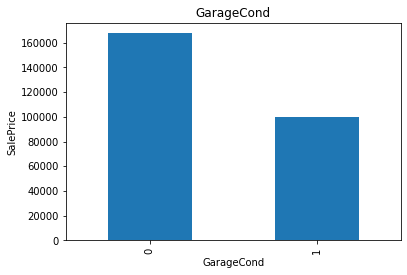

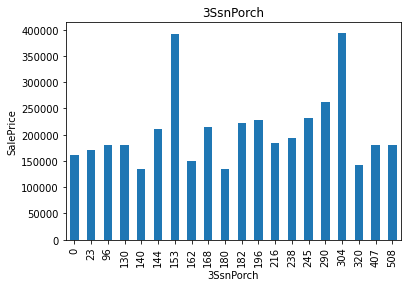

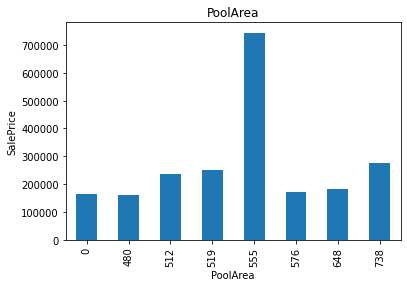

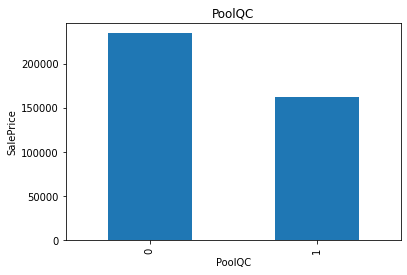

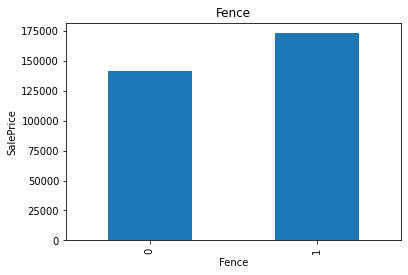

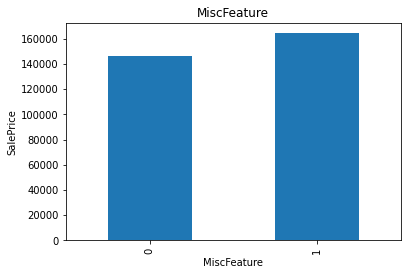

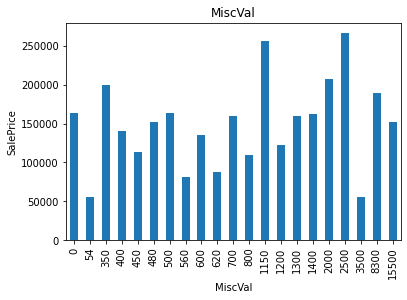

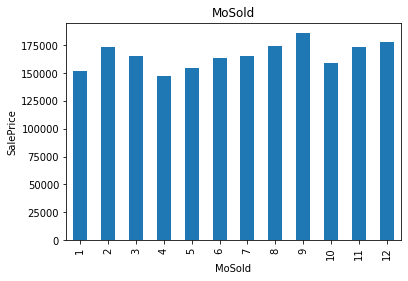

In [ ]:
# finding relationship between discrete and sale price
for f in discrete_features:
    HPdf.groupby(f)['SalePrice'].median().plot.bar()
    plt.xlabel(f)
    plt.title(f)
    plt.ylabel('SalePrice')
    plt.show()

we can see that certain features like OverallQual,Garagecars, TotRmsAbvGrd and OverallCond shows exponential growth with sale price

In [ ]:
# getting continous_feature
continous_features = [f for f in numerical_features if f not in discrete_features+year_feature+['Id']]
print(len(continous_features))

14


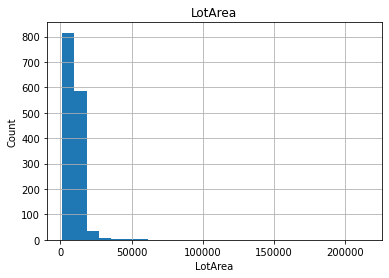

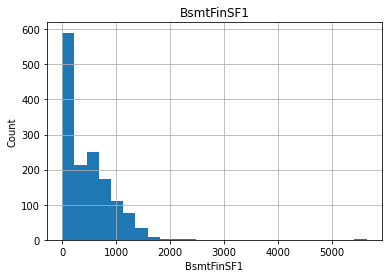

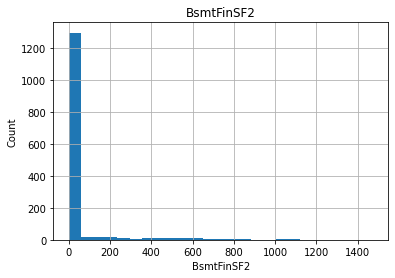

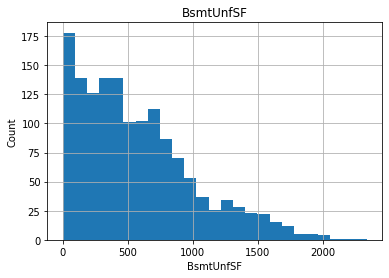

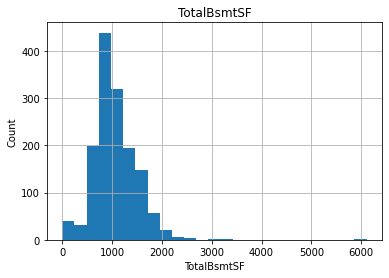

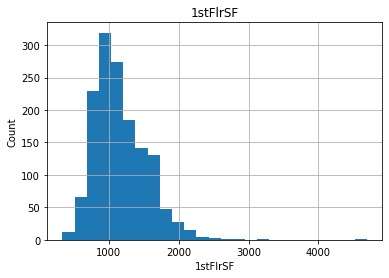

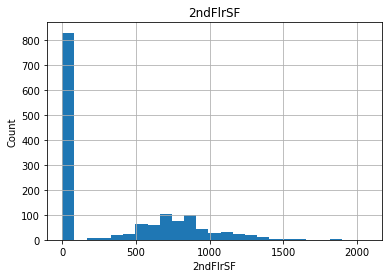

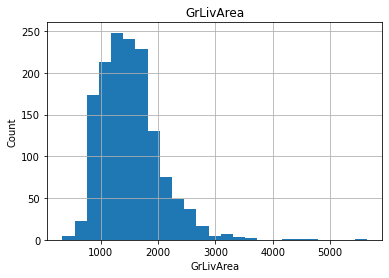

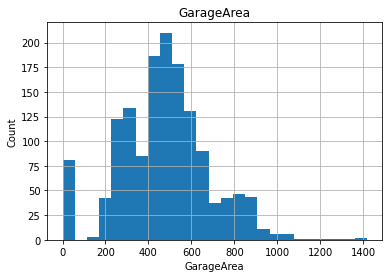

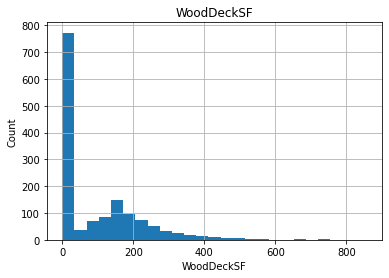

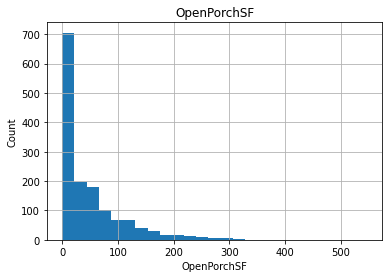

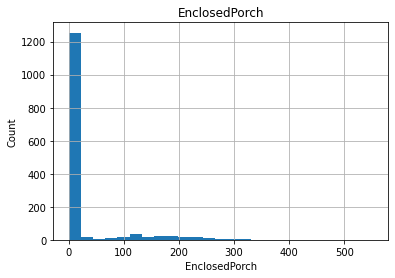

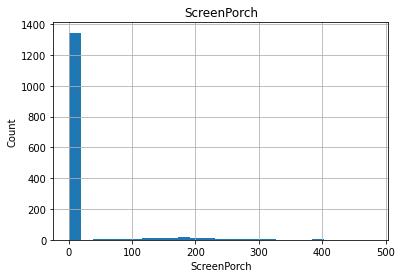

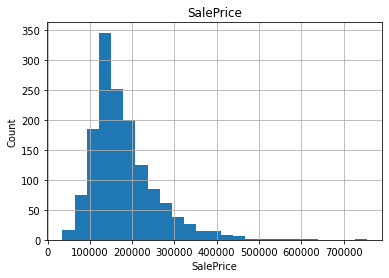

In [ ]:
# creating histogram for continous_feature
for f in continous_features:
    HPdf[f].hist(bins=25)
    plt.xlabel(f)
    plt.ylabel("Count")
    plt.title(f)
    plt.show()

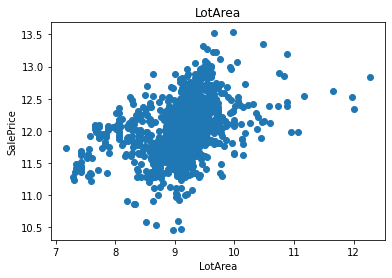

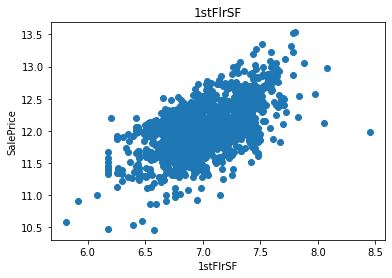

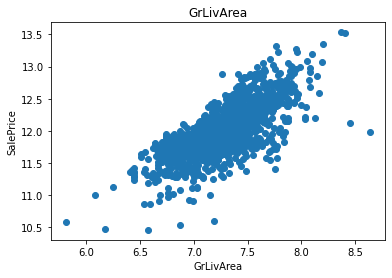

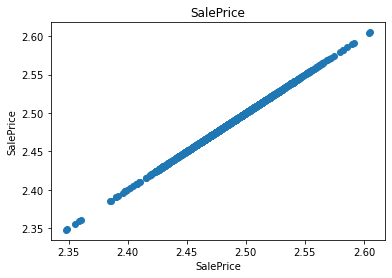

In [ ]:
# doing logarthmic transformation

for f in continous_features:
    datacopy = HPdf.copy() # we do this step because HPdf will be unaltered and the changes we make just stayes in datacopy
    if 0 in datacopy[f].unique():
        pass
    else:
        datacopy[f] = np.log(datacopy[f])
        datacopy['SalePrice'] = np.log(datacopy['SalePrice'])
        plt.scatter(datacopy[f], datacopy['SalePrice'])
        plt.xlabel(f)
        plt.ylabel('SalePrice')
        plt.title(f)
        plt.show()


After applying log normal distribution we get monotonic relationship which gives positive correlation value

# Exploring Outliers

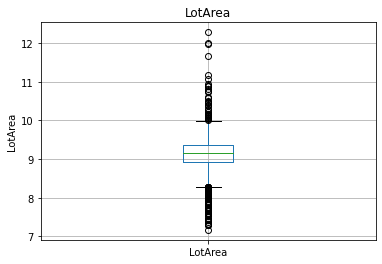

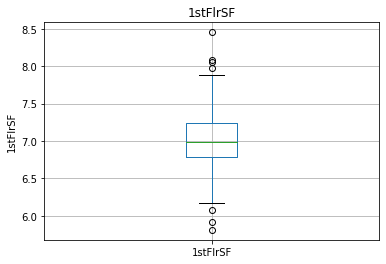

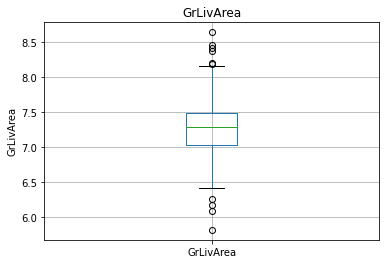

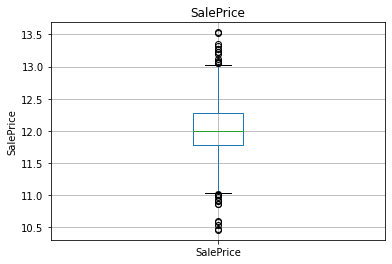

In [ ]:
for f in continous_features:
    datacopy = HPdf.copy()
    if 0 in datacopy[f].unique():
        pass
    else:
        datacopy[f] = np.log(datacopy[f])
        datacopy.boxplot(column=f)
        plt.ylabel(f)
        plt.title(f)
        plt.show()

#Categorical Variables

In [ ]:
# displaying all the categorical feature
cat_variables = [f for f in HPdf.columns if HPdf[f].dtype == 'O']
cat_variables

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
HPdf[cat_variables].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [ ]:
# first we should focus on cardinality value(How many unique categories does my feature has?)
for f in cat_variables:
    print(f'{f} has {len(HPdf[f].unique())} categories')

MSZoning has 5 categories
Street has 2 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 15 categories
Exterior2nd has 16 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 6 categories
KitchenQual has 4 categories
Functional has 7 categories
PavedDrive has 3 categories
SaleType has 9 categories
SaleCondition has 6 categories


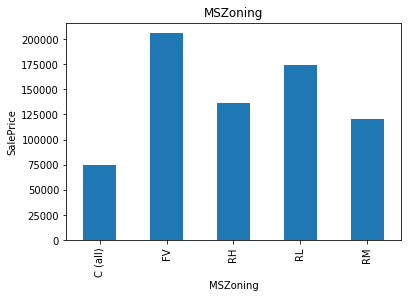

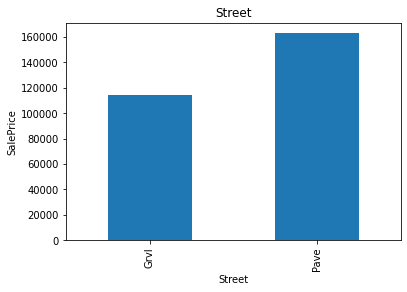

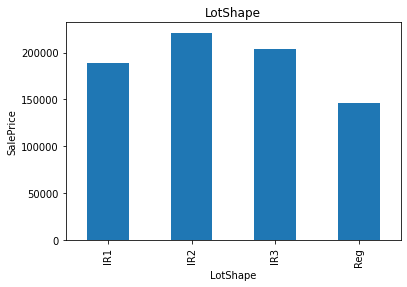

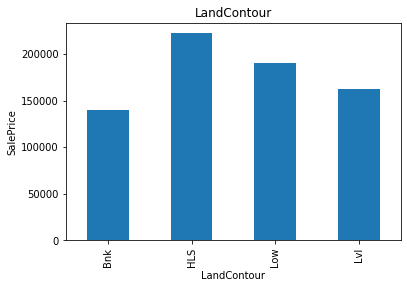

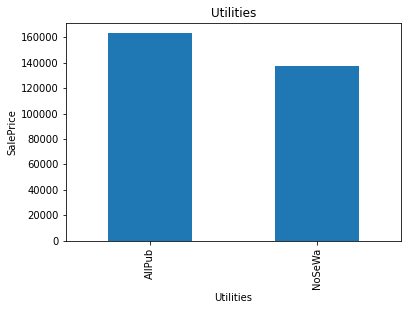

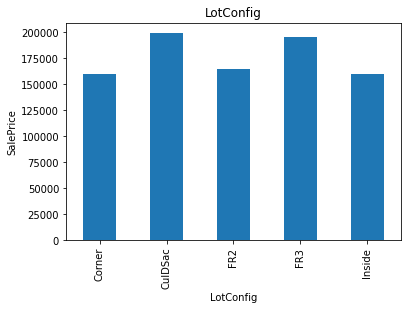

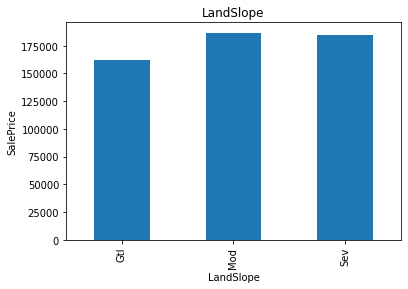

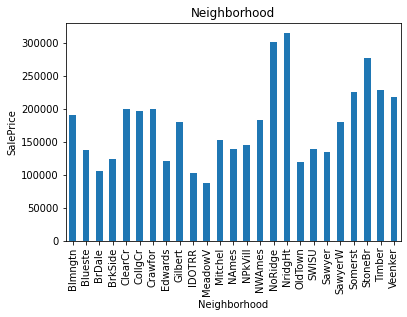

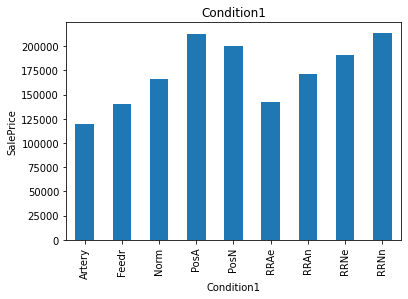

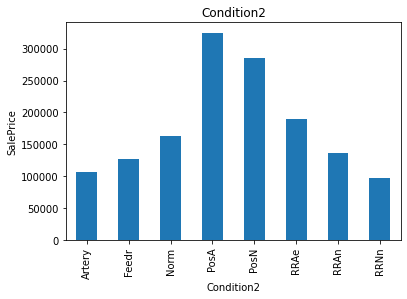

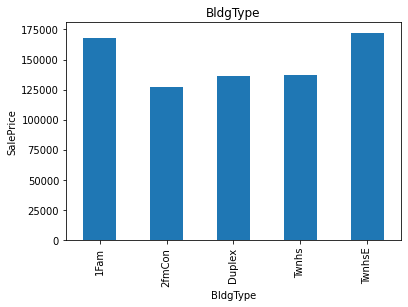

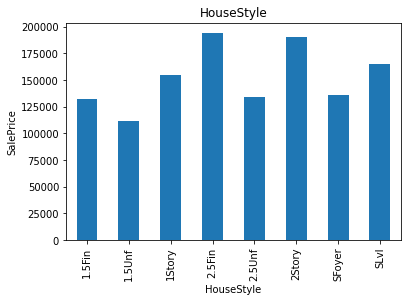

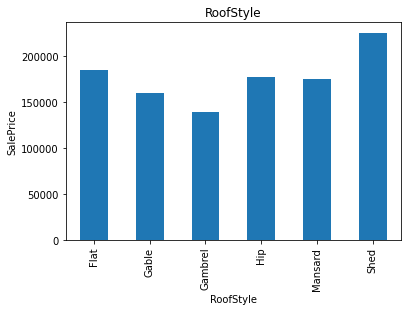

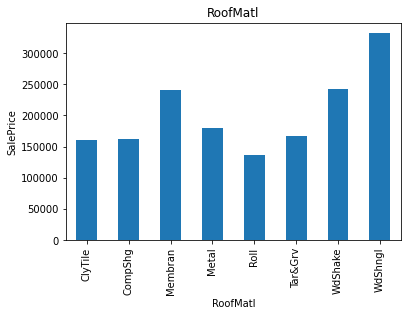

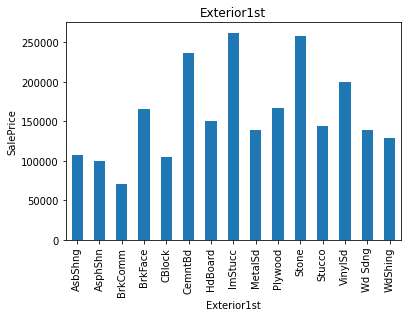

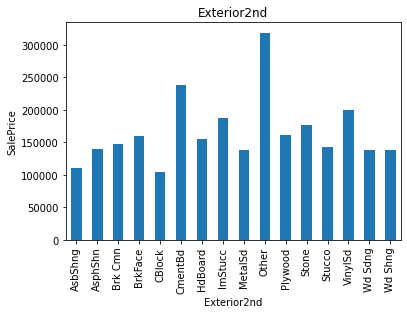

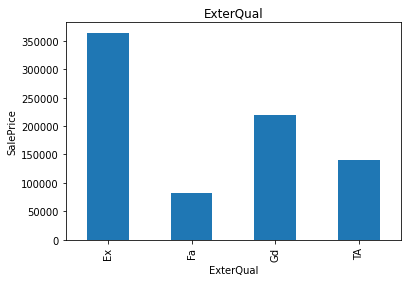

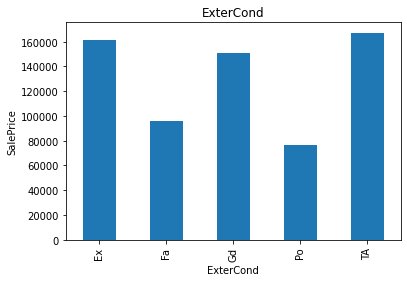

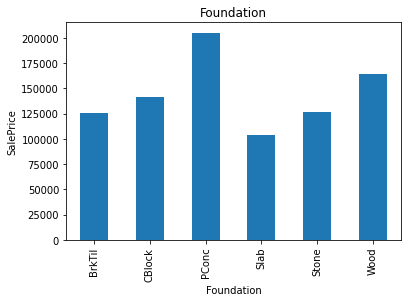

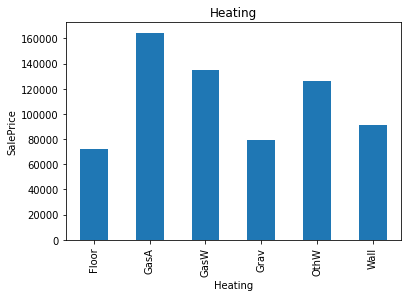

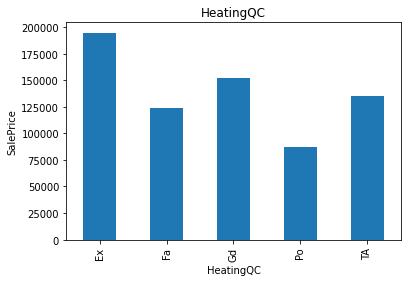

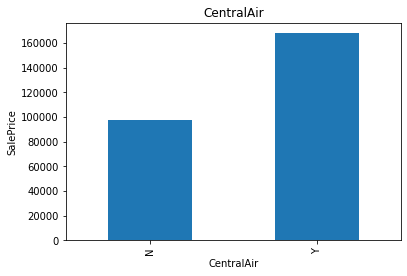

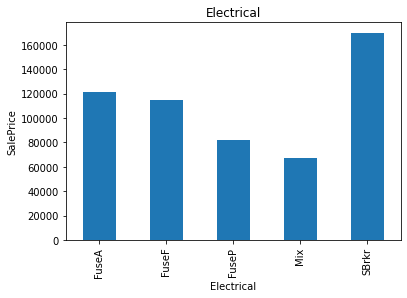

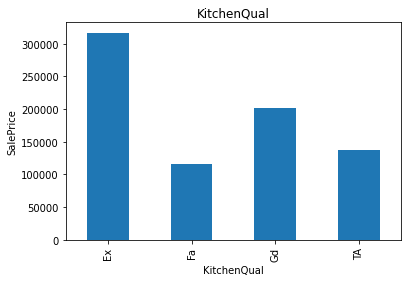

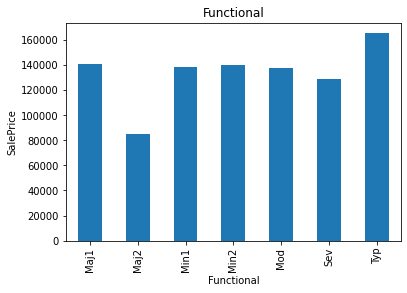

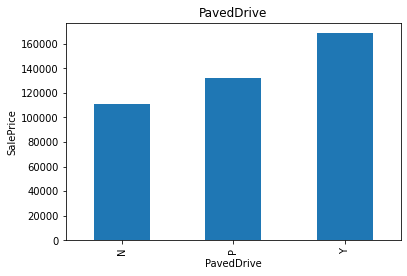

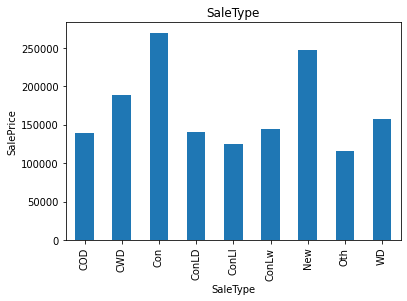

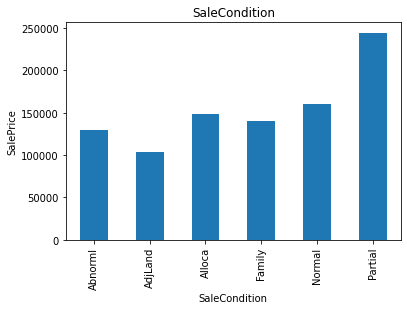

In [ ]:
# relation between categorical and sale price
for f in cat_variables:
    datacopy = HPdf.copy()
    datacopy.groupby(f)['SalePrice'].median().plot.bar()
    plt.xlabel(f)
    plt.ylabel('SalePrice')
    plt.title(f)
    plt.show()